# Multiple Linear Regression
## Muhammad Rofi Ariansyah
## 41155050210066

In [2]:
# Training Dataset
import pandas as pd
pizza = {'diameter': [6,8,10,14,18],
         'n_topping':[2,1,0,2,0],
         'harga': [7,9,13,17.5,18]}
train_pizza_df = pd.DataFrame(pizza)
train_pizza_df


,diameter,n_topping,harga
0,6,2,7.0
1,8,1,9.0
2,10,0,13.0
3,14,2,17.5
4,18,0,18.0


In [3]:
# Testing Dataset
pizza = {'diameter': [8,9,11,16,12],
         'n_topping':[2,0,2,2,0],
         'harga': [11,8.5,15,18,11]}
test_pizza_df = pd.DataFrame(pizza)
test_pizza_df

,diameter,n_topping,harga
0,8,2,11.0
1,9,0,8.5
2,11,2,15.0
3,16,2,18.0
4,12,0,11.0


## Preprocessing Dataset

In [4]:
# Preprocessing Dataset
import numpy as np
X_train = np.array (train_pizza_df[['diameter','n_topping']])
y_train = np.array (train_pizza_df['harga'])

print(f'X_train:\n{X_train}\n')
print(f'y_train:{y_train}')

X_train:
[[ 6  2]
 [ 8  1]
 [10  0]
 [14  2]
 [18  0]]

y_train:[ 7.   9.  13.  17.5 18. ]


In [5]:
import numpy as np
X_test = np.array (test_pizza_df[['diameter','n_topping']])
y_test = np.array (test_pizza_df['harga'])

print(f'X_train:\n{X_test}\n')
print(f'y_train:{y_test}')

X_train:
[[ 8  2]
 [ 9  0]
 [11  2]
 [16  2]
 [12  0]]

y_train:[11.   8.5 15.  18.  11. ]


# Penerapan Multiple Linear Regression
- Multiple Linear Regression merupakan generalisasi dari simple Linear Regression yang memungkinkan untuk menggunakan beberapa explanotory variables
- pada Multiple linear regression menggunakan lebih dari satu features untuk melakukan prediksi 

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'r_squared: {r2_score(y_test,y_pred)}')

r_squared: 0.7701677731318468


# Polynomial Regression
Polinomial Regression memodelkan hubungan antara independent variable X (features) dan dependent variable y(target) sebagai derajat dalam x

In [7]:
X_train = np.array(train_pizza_df['diameter']).reshape(-1,1)
y_train = np.array(train_pizza_df['harga'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

y_train: [ 7.   9.  13.  17.5 18. ]


Polynomial Regression: Quadratic

In [8]:
# Polinomial Features
from sklearn.preprocessing import PolynomialFeatures
quadratic_features = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_features.fit_transform(X_train)
print(f'X_train_quadratic:\n{X_train_quadratic}\n')

X_train_quadratic:
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]



## Training Model

In [9]:
model = LinearRegression()
model.fit(X_train_quadratic, y_train)

LinearRegression()

## Visialisasi Model

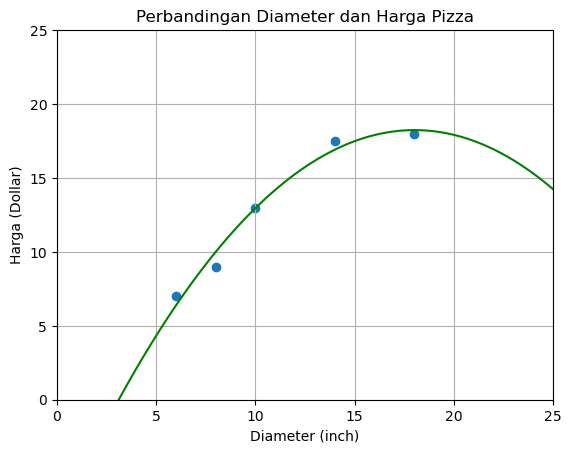

In [10]:
import matplotlib.pyplot as plt

X_vis = np.linspace(0, 25, 100).reshape(-1,1)
X_vis_quadratic = quadratic_features.transform(X_vis)
y_vis_quadratic =  model.predict(X_vis_quadratic)

plt.scatter (X_train, y_train)
plt.plot(X_vis,y_vis_quadratic,'-g')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (Dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

Polinomila Regression : Quadratic vs Cubic

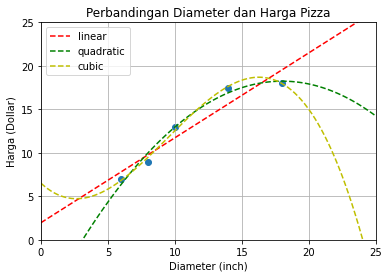

In [14]:
# Training Set
plt.scatter (X_train, y_train) # plotting dataset

# Linear
model = LinearRegression()
model.fit(X_train,y_train)
X_vis = np.linspace(0,25,100).reshape(-1,1)
y_vis = model.predict(X_vis)
plt.plot (X_vis, y_vis, '--r', label='linear')

# Quadratic
quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_quadratic, y_train)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis = model.predict(X_vis_quadratic)
plt.plot(X_vis, y_vis, '--g', label='quadratic')

# Cubic
cubic_feature = PolynomialFeatures(degree=3)
X_train_cubic = cubic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_cubic, y_train)
X_vis_cubic = cubic_feature.transform(X_vis)
y_vis = model.predict(X_vis_cubic)
plt.plot(X_vis, y_vis, '--y', label='cubic')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (Dollar)')
plt.legend()
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()